# 实验三：参数估计 & 非参数估计

- 专业：物联网工程
- 姓名：秦泽斌
- 学号：2212005

## 一、实验要求
### 1. 初级要求：
生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$

**在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果**
### 2. 中级要求：
**在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果**
### 3. 高级要求：
**在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果**

## 二、实验内容

##### 需要导入的包

In [21]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. 初级要求
**在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果**
#### 1.1 生成数据集 Semesion

In [22]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵a
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    temp_num = round(1200 * P)
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    return X.T

In [23]:
def Generate_DataSet_plot(mean, cov, P):
    # 画出不同先验对应的散点图
    xx = []
    label = 1
    for i in range(3):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    # 画图
    plt.figure()
    for i in range(3):
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()
    return xx

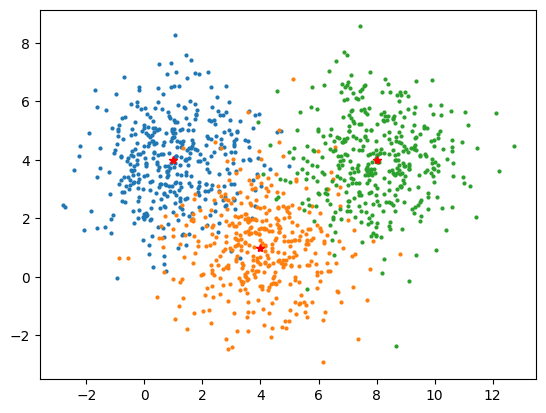

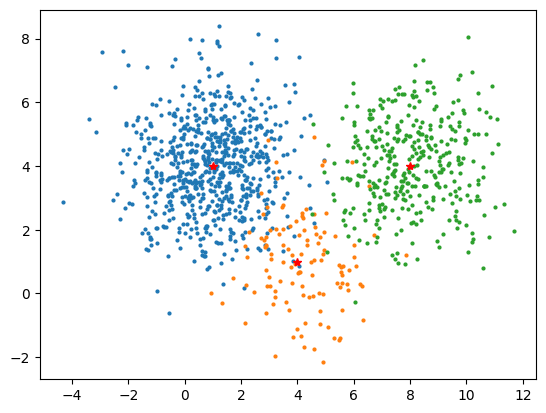

((1200, 3), (1200, 3))

In [24]:
# 根据mean，cov，P1,P2生成数据集X1,X2
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
cov = [[2, 0], [0, 2]]  # 方差矩阵
num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率
X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)
X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)
X1 = np.vstack(X1)
X2 = np.vstack(X2)
X1.shape, X2.shape  # 前两列是坐标，最后一列是标签

In [25]:
# 按label进行数据集分类
X1_1=X1[np.where(X1[:,2]==1.0)]
X1_2=X1[np.where(X1[:,2]==2.0)]
X1_3=X1[np.where(X1[:,2]==3.0)]
X2_1=X2[np.where(X2[:,2]==1.0)]
X2_2=X2[np.where(X2[:,2]==2.0)]
X2_3=X2[np.where(X2[:,2]==3.0)]

#### 1.2 极大似然估计

In [26]:
# 极大似然估计
# 输入n*2维数据
def LikelyHood(X):
    mu = np.mean(X, axis=0)
    # python把向量转化成矩阵需要用reshape
    cov = np.array([np.dot((X[i] - mu).reshape(2,1), (X[i] - mu).reshape(1, 2)) for i in range(len(X))]).mean(axis=0)
    return mu, cov

In [27]:
# 利用极大似然估计进行参数估计
mu_1_1,cov_1_1=LikelyHood(X1_1[:,0:2])
mu_1_2,cov_1_2=LikelyHood(X1_2[:,0:2])
mu_1_3,cov_1_3=LikelyHood(X1_3[:,0:2])
mean_1=np.array([list(mu_1_1),list(mu_1_2),list(mu_1_3)]) 
cov_1=np.array([list(cov_1_1),list(cov_1_2),list(cov_1_3)])
print("X1数据集mu参数估计为：")
mean_1
print("X1数据集cov参数估计为(按不同label)：")
cov_1
mu_2_1,cov_2_1=LikelyHood(X2_1[:,0:2])
mu_2_2,cov_2_2=LikelyHood(X2_2[:,0:2])
mu_2_3,cov_2_3=LikelyHood(X2_3[:,0:2])
mean_2=np.array([list(mu_2_1),list(mu_2_2),list(mu_2_3)])
cov_2=np.array([list(cov_2_1),list(cov_2_2),list(cov_2_3)])
print("X2数据集mu参数估计为：")
mean_2
print("X2数据集cov参数估计为(按不同label)：")
cov_2

X1数据集mu参数估计为：
X1数据集cov参数估计为(按不同label)：
X2数据集mu参数估计为：
X2数据集cov参数估计为(按不同label)：


array([[[ 2.08008425,  0.06969979],
        [ 0.06969979,  2.08532941]],

       [[ 1.50539159, -0.09607428],
        [-0.09607428,  2.06339045]],

       [[ 2.00580996,  0.1302177 ],
        [ 0.1302177 ,  1.91695613]]])

#### 1.3 似然率测试规则&最大后验概率规则

In [28]:
def Gaussian_function(x, mean, cov):
    det_cov = np.linalg.det(cov.tolist())  # 计算方差矩阵的行列式
    inv_cov = np.linalg.inv(cov.tolist())  # 计算方差矩阵的逆
    #计算概率p(x|w)
    p = 1/(2*np.pi*np.sqrt(det_cov))*np.exp(-0.5 * np.dot(np.dot((x - mean),inv_cov), (x - mean)))
    return p

In [29]:
# 似然率测试规则
def Likelihood(X, mean, cov):
    class_num = mean.shape[0]  # 类的个数
    num = np.array(X).shape[0]
    wrong = 0
    for i in range(num):
        p_temp = np.zeros(3)
        for j in range(class_num):
            # 计算样本i决策到j类的概率
            p_temp[j] = Gaussian_function(X[i][0:2], mean[j], cov[j])  
        p_class = np.argmax(p_temp) + 1  # 得到样本i决策到的类
        if p_class != X[i][2]:
            wrong += 1
    return round(wrong / num , 3)

In [30]:
##最大后验概率规则
def Posterior(X, mean, cov, P):
    # 类的个数
    class_num = mean.shape[0]  
    num = np.array(X).shape[0]
    wrong = 0
    for i in range(num):
        p_temp = np.zeros(3)
        for j in range(class_num):
            # 计算样本i是j类的后验概率
            p_temp[j] =Gaussian_function(X[i][0:2],mean[j],cov[j])*P[j]
        p_class = np.argmax(p_temp) + 1  # 得到样本i分到的类
        if p_class != X[i][2]:
            wrong += 1
    return round(wrong / num,3)

In [32]:
# 单次试验求不同准则下的分类误差
# 通过不同规则得到不同分类错误率

h = 1
# 计算似然率测试规则误差
error_likelihood = Likelihood(X1, mean_1, cov_1)
error_likelihood_2 = Likelihood(X2, mean_2, cov_2)

# 计算最大后验概率规则误差
error_Max_Posterior_Rule = Posterior(X1, mean_1, cov_1, P1)
error_Max_Posterior_Rule_2 = Posterior(X2, mean_2, cov_2, P2)


In [35]:
print("实验方法:    极大似然规则      最大后验规则")
print("X1误差: \t{}   \t{}".format(error_likelihood,error_Max_Posterior_Rule))
print("X2误差: \t{}     \t{}".format(error_likelihood_2, error_Max_Posterior_Rule_2))

实验方法:    极大似然规则      最大后验规则
X1误差: 	0.088   	0.088
X2误差: 	0.054     	0.037


### 2. 中级要求
**在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果**
#### 2.1 ⾼斯核函数估计⽅法，采用留一法进行交叉验证

In [38]:
# 高斯核概率密度函数计算
# 在公式中，x和mean应该是列向量，但是为了方便，这里接收的都是行向量（维度：1*2）
def Gaussian_Kernel(x, X, h=2):
    # 计算概率p(x|w)
    p = (1 / (np.sqrt(2 * np.pi) * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h**2)) for i in range(len(X))]).mean()
    return p

In [36]:
# 高斯核函数估计方法 + 似然率测试规则
def Gaussian_Likelihood_cross(X,P,h):
    class_num = X.shape[1]
    num = X.shape[0]
    wrong = 0
    # 对每一个样例进行分类
    for i in range(num):
        class_p = np.zeros(class_num)
        start=0
        for j in range(class_num):
            # 计算该样例属于第j类的概率
            if i>=start and i<start+round(num*P[j]):
                data = X[start:start+round(num*P[j]),:]
                data =np.delete(data,i-start,axis=0)
                class_p[j]=Gaussian_Kernel(X[i][0:2],data[:,0:2],h)
            else:
                class_p[j]=Gaussian_Kernel(X[i][0:2],X[start:start+round(num*P[j]),0:2],h)
            start+=round(num*P[j])
        start_class = np.argmax(class_p)+1
        if start_class!=X[i][2]:
            wrong+=1
    return round(wrong / num , 3)

#### 2.2 实验结果

[0.312, 0.178, 0.135, 0.128, 0.141]


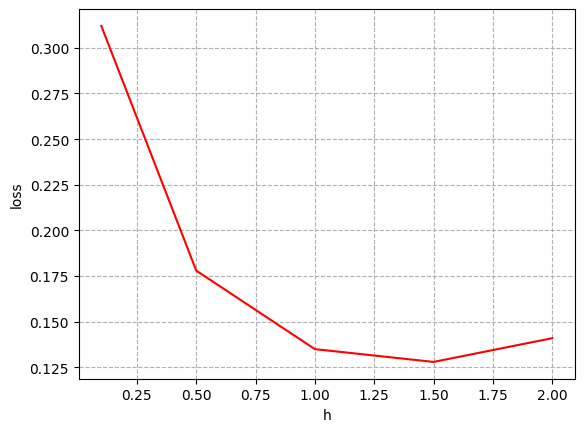

In [40]:
error_h=[] 
h_total = [0.1,0.5,1,1.5,2]
for h in h_total:
    error_h.append(Gaussian_Likelihood_cross(X1, P2, h))
print(error_h)
plt.figure()
plt.plot(h_total,error_h, 'r')
plt.grid(linestyle="--")
plt.xlabel("h")
plt.ylabel("loss")
# 显示图
plt.show()

[0.065, 0.051, 0.058, 0.058, 0.058]


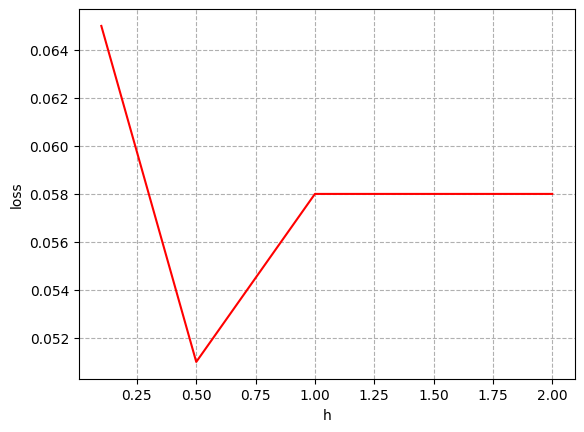

In [41]:
error_h=[] 
h_total = [0.1,0.5,1,1.5,2]
for h in h_total:
    error_h.append(Gaussian_Likelihood_cross(X2, P2, h))
print(error_h)
plt.figure()
plt.plot(h_total,error_h, 'r')
plt.grid(linestyle="--")
plt.xlabel("h")
plt.ylabel("loss")
# 显示图
plt.show()

#### 2.3 实验结果分析

- 对于X1数据集，显然最优的h值为1.5，且为拐点，故实际有效
- 对于X2数据集，显然最优的h值为0.5，且为拐点，故实际有效

### 3. 高级要求

**在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果**

#### 3.1 概率密度函数
- 生成标准差距离
-  根据第k个数据点的位置计算V
-  找到前k个数据点的类别,分别加到对应类的权重上
-  计算每个采样点的概率密度函数

In [45]:
def Kneibor_Eval(X, k):
    num = len(X)
    # Xtrain = np.array(X)
    # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
    p = np.zeros((200, 200, 3))
    # 在[-5,15]的范围内，以0.1为步长估计概率密度
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            total = []
            x = -5 + 0.1 * i
            y = -5 + 0.1 * j
            for data in X:
                # 生成标准差距离
                temp = []
                temp = list(data)
                dis = math.sqrt((x - data[0]) ** 2 + (y - data[1]) ** 2)
                temp.append(dis)
                total.append(temp)
            total = np.array(total)
             # 按最后一列排序
            total_sort = total[np.lexsort(total.T)]
            
            # 根据第k个数据点的位置计算S
            total_choose = total_sort[:k, :]
            S = math.pi * (total_choose[k - 1][3]**2)
            
            # 找到前k个数据点的类别,分别加到对应类的权重上
            num1 = sum(total_choose[:,2]==1.0)
            num2 = sum(total_choose[:,2]==2.0)
            num3 = sum(total_choose[:,2]==3.0)
            
            # 计算每个采样点的概率密度函数
            res = []
            res.append(num1 / (S * 1200))
            res.append(num2 / (S * 1200))
            res.append(num3 / (S * 1200))
            p[i][j]=res
    return p

#### 3.2 K=1时的概率密度估计结果

- **数据集X1**

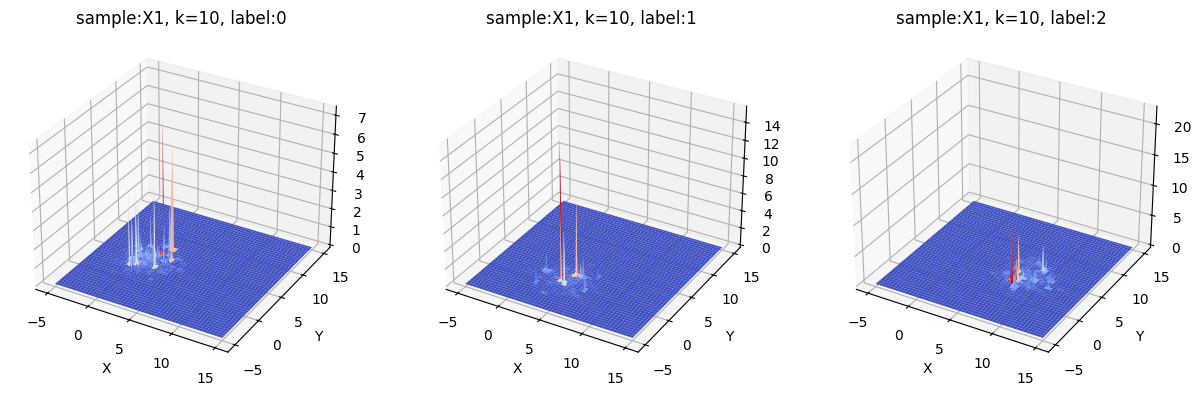

In [47]:
p = Kneibor_Eval(X1, 1)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

- **数据集X2**

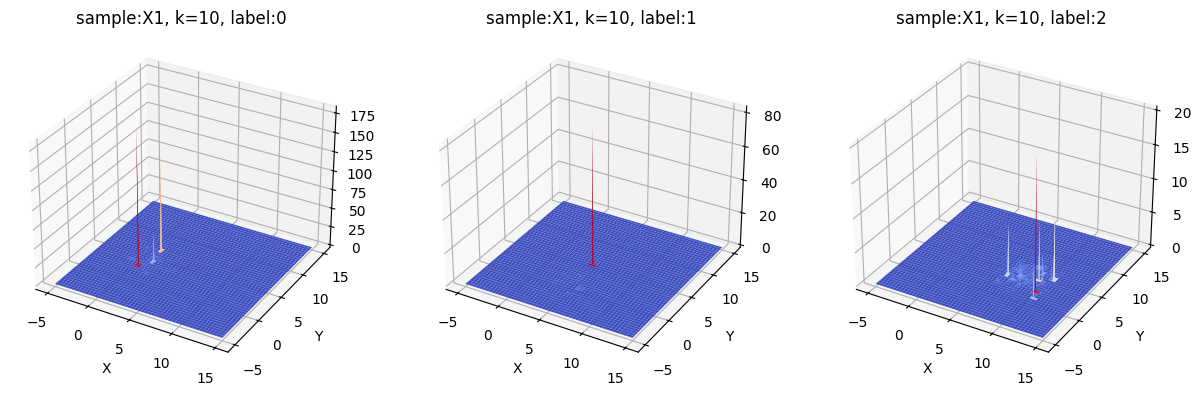

In [48]:
p = Kneibor_Eval(X2, 1)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

#### 3.3 K=3时的概率密度估计结果

- **X1数据集**

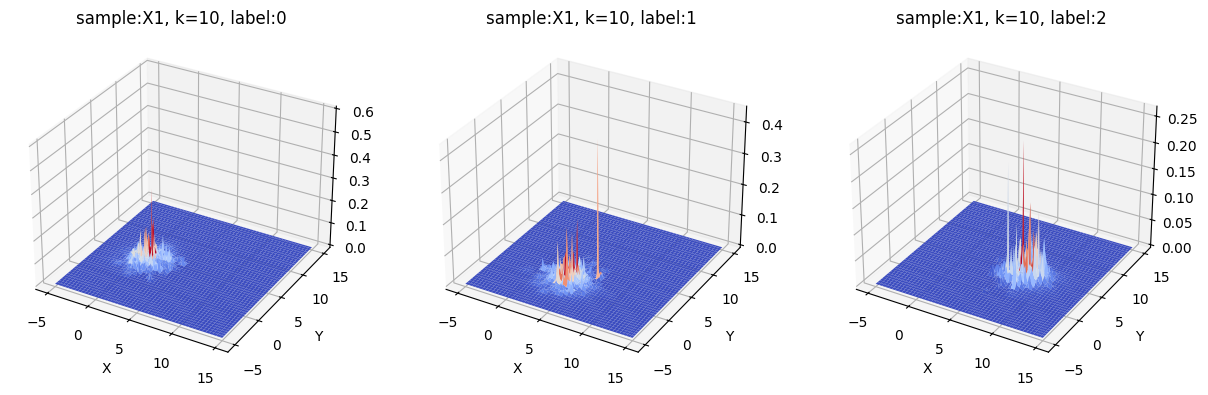

In [49]:
p = Kneibor_Eval(X1, 3)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

- **X2数据集**

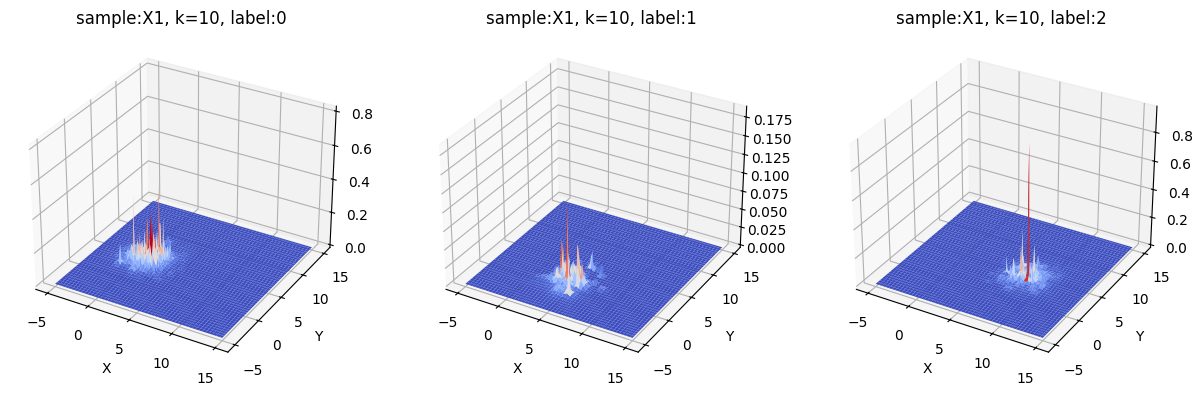

In [50]:
p = Kneibor_Eval(X2, 3)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

#### 3.4 K=5时的概率密度估计结果

- **X1数据集**

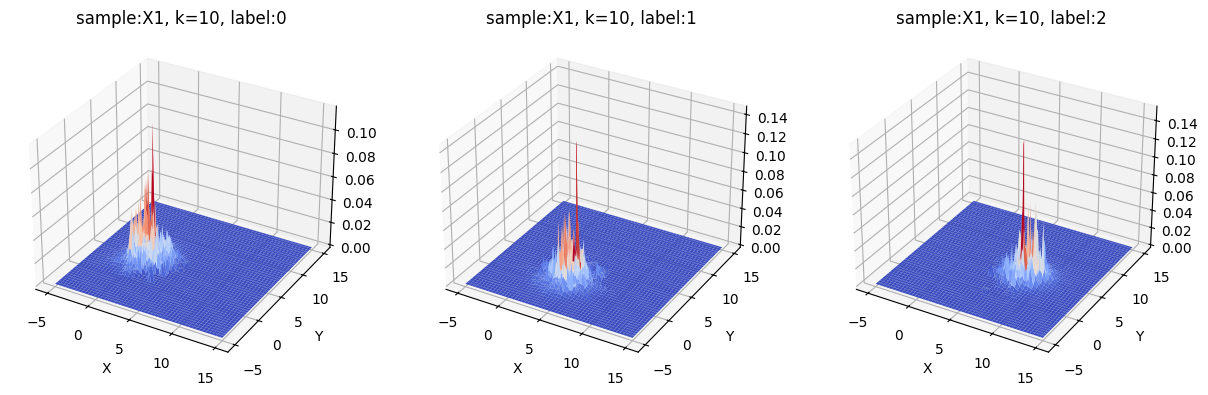

In [51]:
p = Kneibor_Eval(X1, 5)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

- **X2数据集**

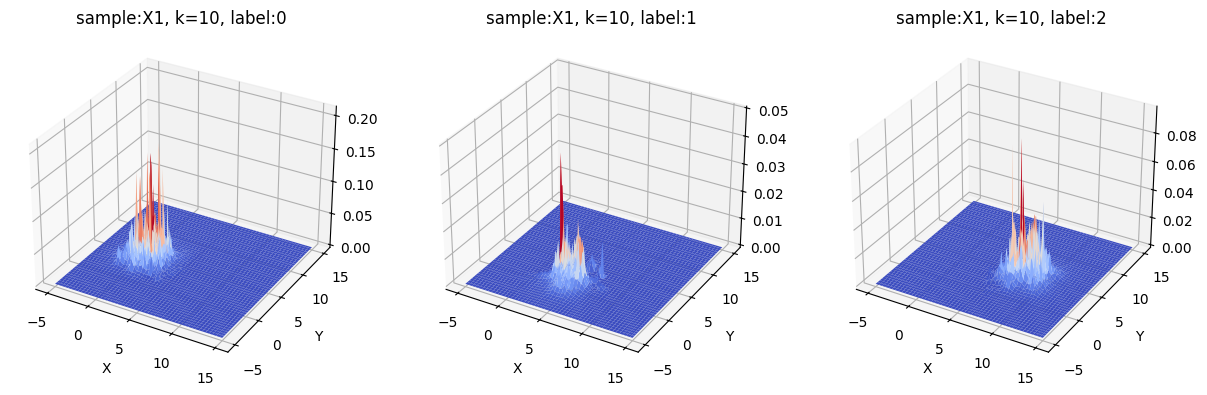

In [52]:
p = Kneibor_Eval(X2, 5)  # 获得概率密度估计

X,Y = np.mgrid[-5:15:200j, -5:15:200j]
Z0 = p[:, :, 0]
Z1 = p[:, :, 1]
Z2 = p[:, :, 2]
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## 三、总结与分析

通过本次实验，我更加深刻的认识了参数与非参数估计，并增强了将理论知识转化为实际代码的能力，提高了动手能力，收获很多！